<a href="https://colab.research.google.com/github/mirzafaradiba01/Machine-Learning/blob/main/3A_18_Mirza_Priscilla_Faradiba_Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : Mirza Priscilla Faradiba**

**Kelas : TI-3A**

**No.Absen : 18**

**Materi : Neural Network dan Deep Learning**

#Praktikum 1

Klasifikasi Iris dengan Perceptron

**Langkah 1 - Import Library**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris (2).csv


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Langkah 2 - Load Data dan Visualisasi**

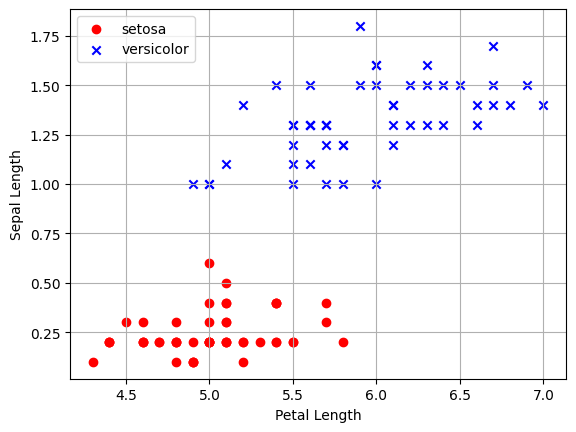

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
setosa = df[df[4] == 'Iris-setosa']
versicolor = df[df[4] == 'Iris-versicolor']
virginica = df[df[4] == 'Iris-virginica']

a, b = 0, 3
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

**Langkah 3 - Membuat Kelas Perceptron**

In [ ]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

**Langkah 4 - Pilih Data dan Encoding Label**

In [ ]:
y = df.iloc[0:100, 4].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[0:100, [0, 3]].values # slice data latih

**Langkah 5 - Fitting Model**

In [ ]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

**Langkah 6 - Visualisasi Nilai Error Per Epoch**

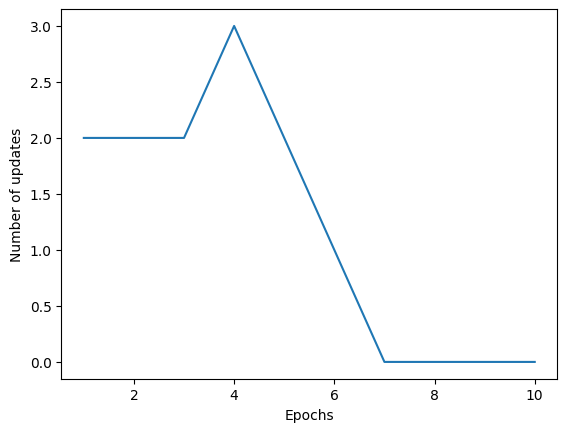

In [ ]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

**Langkah 7 - Visualiasasi Decision Boundary**

<ipython-input-8-e5746f2b3071>:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)


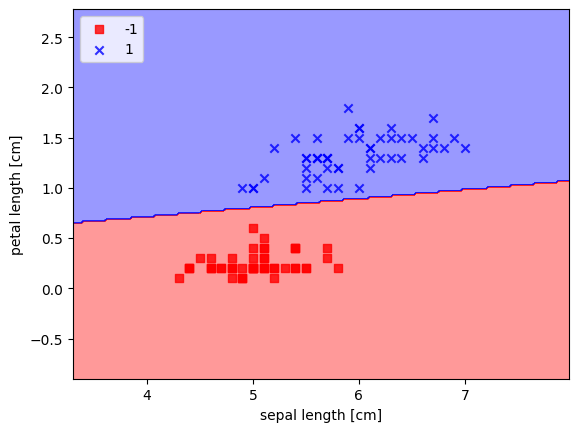

In [ ]:
# buat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

plot_decision_regions(X, y, ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

#Praktikum 2


Klasifikasi Berita dengan Perceptron

**Langkah 1 - Import Library**

In [ ]:
from sklearn.datasets import fetch_20newsgroups # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

**Langkah 2 - Pilih Label dan Split Data**

In [ ]:
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

**Langkah 3 - Ekstrak Fitur dan Buat Model Perceptron**

In [ ]:
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



Dataset yang digunakan pada kode program diatas adalah 20newsgroup yang terdiri dari sekitar 20.000 dokumen. Scikit-learn bahkan menyediakan fungsi yang memberikan kemudahan untuk mengunduh dan membaca kumpulan dataset dengan menggunakan sklearn.datasets. pada kode program diatas Perceptron mampu melakukan klasifikasi multikelas; strategi yang digunakan adalah one-versus-all untuk melakukan pelatihan untuk setiap kelas dalam data training. Dokumen teks memerlukan ekstraksi fitur salah satunya adalah bobot tf-idf pada kodeprogram diatas digunakan tfidf-vectorizer.

#Praktikum 3

Nilai Logika XOR dengan MLP

**Langkah 1 - Import Library**

In [ ]:
from sklearn.neural_network import MLPClassifier

**Langah 2 - Buat Data**

In [ ]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

**Langkah 3 - Fit Model**

In [ ]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

**Langkah 4 - Prediksi**

In [ ]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


#Praktikum 4

Klasifikasi dengan ANN

**Langkah 1 - Import Library**

In [1]:
pip install tensorflow

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [4]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [5]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [7]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [9]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

###Membuat Model AN

**Langkah 1 - Inisiasi Model ANN**

In [12]:
ann = tf.keras.models.Sequential()

**Langkah 2 - Membuat Input Layer dan Hidden Layer Pertama**

In [13]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

**Langkah 3 - Membuat Hidden Layer Kedua**

In [14]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

**Langkah 4 - Membuat Output Layer**

In [15]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

####Training Model

**Langkah 1 - Compile Model (Menyatukan Arsitektur) ANN**

In [16]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

**Langkah 2 - Fitting Model**

In [17]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 2s 2ms/step - loss: 0.5777 - accuracy: 0.7467
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4866 - accuracy: 0.7986
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4467 - accuracy: 0.8115
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4257 - accuracy: 0.8169
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4163 - accuracy: 0.8204
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4098 - accuracy: 0.8229
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4042 - accuracy: 0.8260
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3995 - accuracy: 0.8292
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3957 - accuracy: 0.8289
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3922 - accura

**Modelkan Data Baru dan Buat Prediksi**

In [18]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 174ms/step
[[False]]


**Prediksi Dengan Data Testing**

In [19]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 1ms/step
[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


**Cek Akurasi dan Confusion Matrix**

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1476  119]
 [ 169  236]]


0.856

#TUGAS

**Install Tensorflow**

In [21]:
pip install tensorflow

**Import Library**

In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

**Load Dataset MNIST**

In [23]:
# Load dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


**Normalisasi Data**

In [24]:
# Normalisasi data
train_images, test_images = train_images / 255.0, test_images / 255.0

**Arsitektur Model ANN**

In [25]:
# Mendefinisikan model ANN
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Meratakan gambar 28x28 piksel menjadi vektor 1D
    layers.Dense(128, activation='relu'),  # Lapisan tersembunyi dengan 128 neuron dan aktivasi ReLU
    layers.Dropout(0.2),  # Lapisan dropout untuk mencegah overfitting
    layers.Dense(10, activation='softmax')  # Lapisan output dengan 10 neuron untuk 10 kelas
])

In [26]:
# Mengompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
# Melatih model
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.3032 - accuracy: 0.9118
Epoch 2/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1455 - accuracy: 0.9575
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1069 - accuracy: 0.9680
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0887 - accuracy: 0.9729
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0753 - accuracy: 0.9764


**Evaluasi**

In [28]:
# Mengevaluasi model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0803 - accuracy: 0.9772
Test accuracy: 0.9771999716758728


In [29]:
# Membuat prediksi
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)


313/313 [==============================] - 2s 4ms/step


**Confusion Matrix**

In [30]:
# Membuat dan menampilkan matriks konfusi
cm = confusion_matrix(test_labels, predicted_labels)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[ 970    0    2    1    2    0    3    1    1    0]
 [   0 1121    3    4    0    0    2    1    4    0]
 [   2    1 1011    4    2    0    2    6    4    0]
 [   0    0    4  993    1    3    0    5    4    0]
 [   0    0    4    0  968    0    5    2    0    3]
 [   2    0    1    5    1  870    6    1    5    1]
 [   4    3    0    1    4    4  941    0    1    0]
 [   1    6   14    5    0    0    0  997    0    5]
 [   3    2    6    6    5    3    4    6  936    3]
 [   2    4    1    9   16    3    1    5    3  965]]


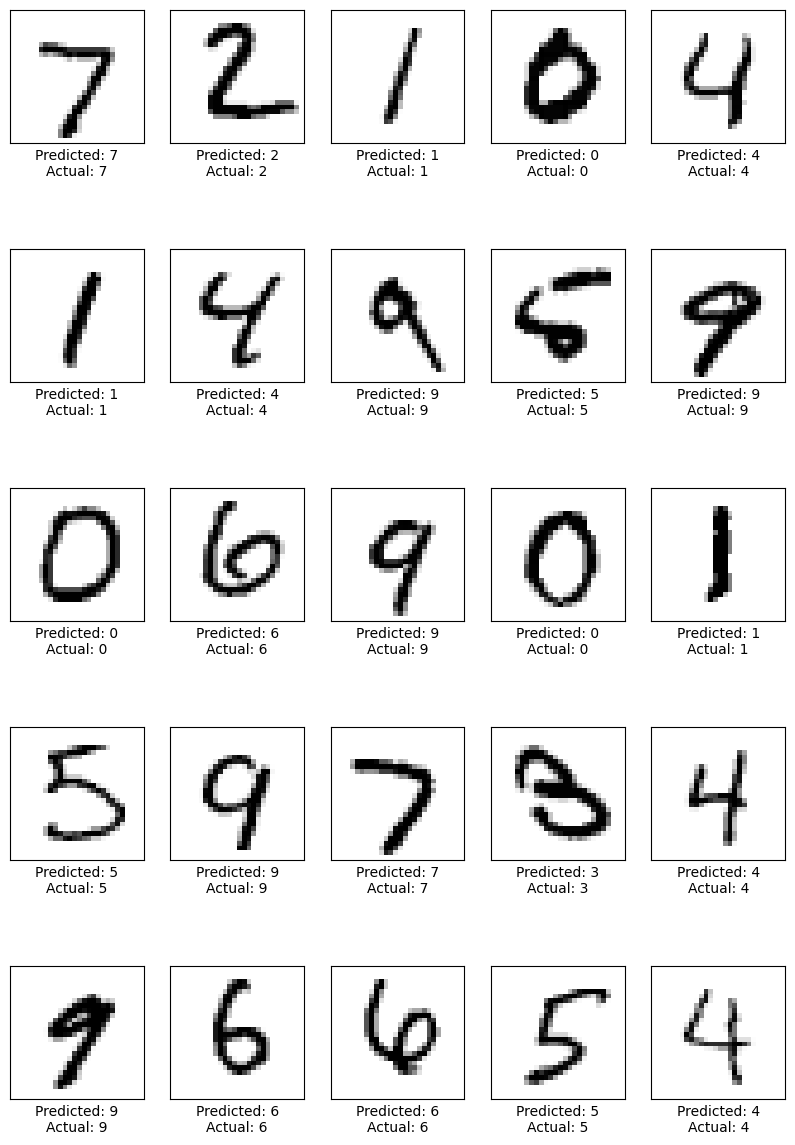

In [35]:
# Visualisasi beberapa prediksi
plt.figure(figsize=(10, 15))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f'Predicted: {predicted_labels[i]}\nActual: {test_labels[i]}')
plt.show()